# Data-driven Passenger Demand Prediction

### Developing a predictive model to estimate passenger demand for Baku Bay ferry services based on different factors. This model can help optimize ferry scheduling and resource allocation.

simulated data

In [8]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Generate synthetic dates for a specified time range
start_date = datetime(2015, 1, 1)
end_date = datetime(2020, 12, 31)
date_range = [start_date + timedelta(days=x) for x in range((end_date-start_date).days + 1)]

# Generate synthetic passenger demand based on random factors
passenger_demand = np.random.randint(10, 100, size=len(date_range))

# Generate synthetic day of the week
day_of_week = np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=len(date_range))

# Generate a hypothetical external event factor
external_event_factor = np.random.uniform(0.8, 1.2, size=len(date_range))

# Generate synthetic weather conditions
temperature = np.random.uniform(5, 30, size=len(date_range))  # Temperature in Celsius
pressure = np.random.uniform(980, 1030, size=len(date_range))  # Atmospheric pressure in hPa
wind_speed = np.random.uniform(0, 15, size=len(date_range))  # Wind speed in km/h

# Create a DataFrame with synthetic data
df = pd.DataFrame({
    'Date': date_range,
    'Day_of_Week': day_of_week,
    'External_Event_Factor': external_event_factor,
    'Temperature_Celsius': temperature,
    'Pressure_hPa': pressure,
    'Wind_Speed_kmh': wind_speed,
    'Passenger_Demand': passenger_demand
})

# Visualizing the head of the dataset
df.head()


        Date Day_of_Week  External_Event_Factor  Temperature_Celsius  \
0 2015-01-01     Tuesday               0.914669            24.639009   
1 2015-01-02    Saturday               1.045174            24.274356   
2 2015-01-03     Tuesday               1.088998            25.680445   
3 2015-01-04   Wednesday               0.872075            16.859984   
4 2015-01-05    Thursday               0.937404             9.276853   

   Pressure_hPa  Wind_Speed_kmh  Passenger_Demand  
0   1002.070827        1.997972                22  
1    994.516739       13.685895                19  
2   1022.237693        3.009948                12  
3    985.548841       13.809339                69  
4    983.856974        1.166129                61  


       External_Event_Factor  Temperature_Celsius  Pressure_hPa  \
count            2192.000000          2192.000000   2192.000000   
mean                0.998713            17.339742   1004.656445   
std                 0.115131             7.240715     14.181438   
min                 0.800490             5.016419    980.010346   
25%                 0.896785            11.050407    992.424950   
50%                 0.998771            17.282085   1004.432394   
75%                 1.098432            23.532151   1016.550931   
max                 1.199814            29.973448   1029.990725   

       Wind_Speed_kmh  Passenger_Demand  
count     2192.000000       2192.000000  
mean         7.527933         55.219891  
std          4.339019         26.412813  
min          0.004492         10.000000  
25%          3.757756         31.000000  
50%          7.607747         56.000000  
75%         11.273398         79.000000  
max         14.984720         99.000000  


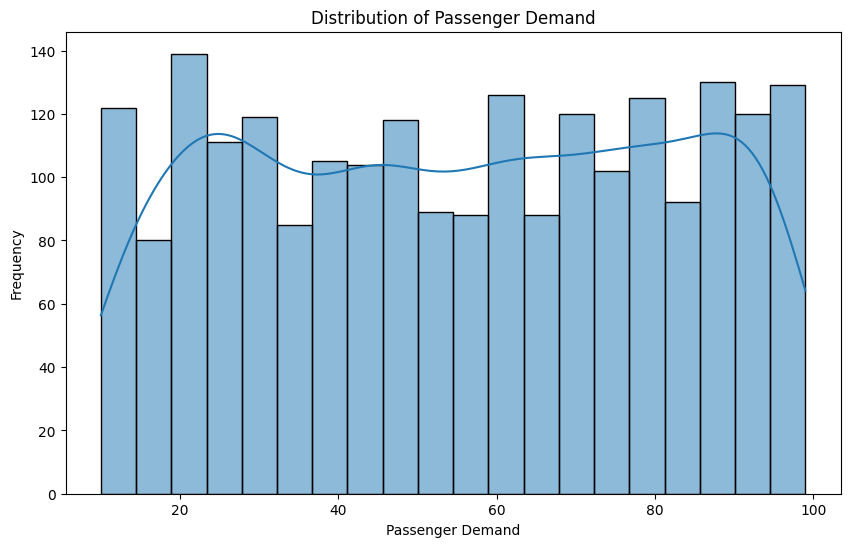

<Figure size 1600x1000 with 0 Axes>

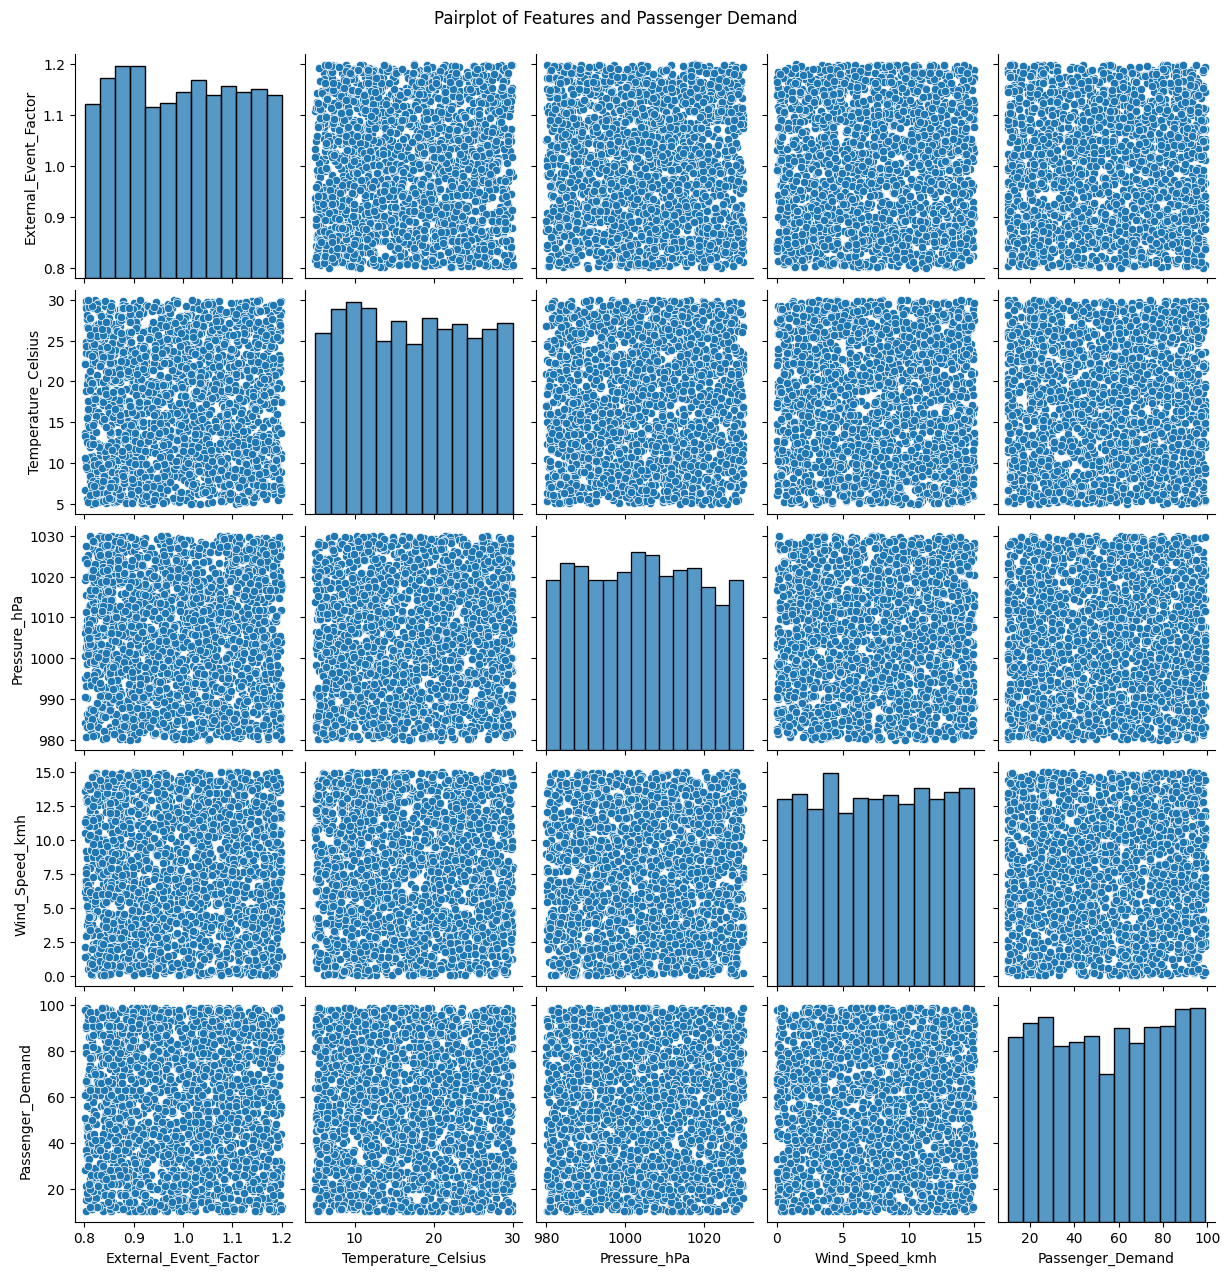

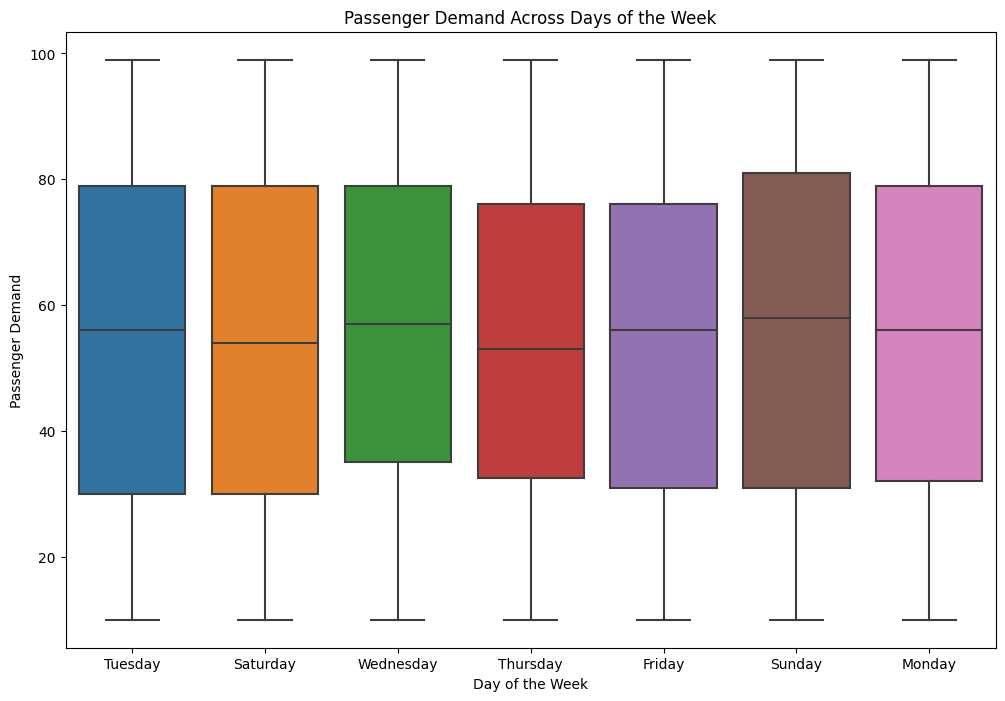

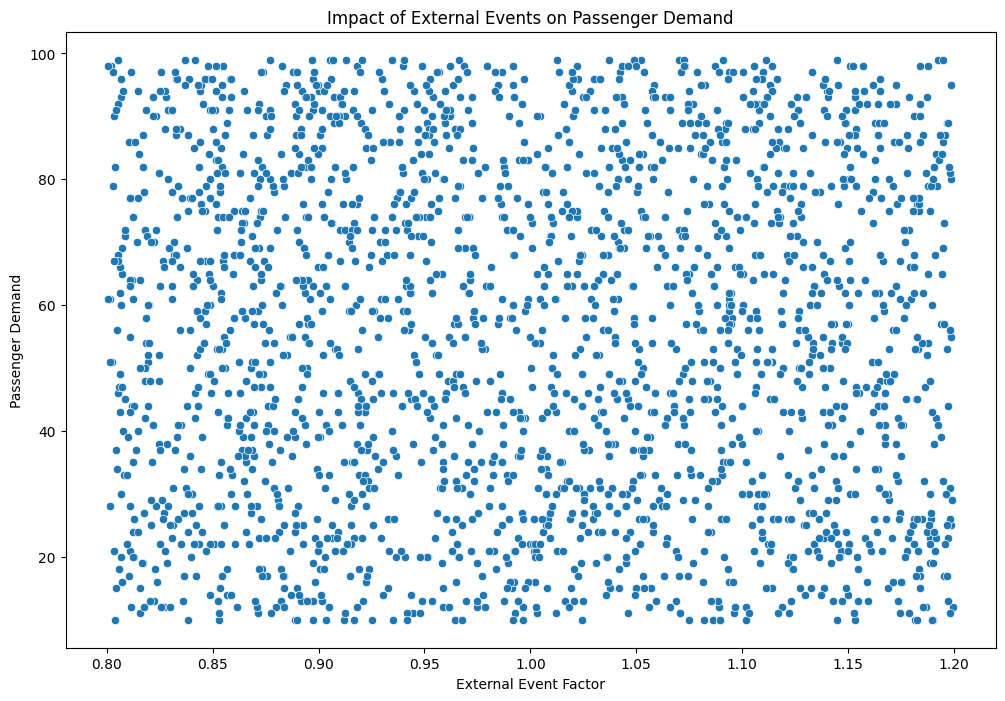

In [12]:
# Display basic statistics of the dataset
print(df.describe())

# Visualize the distribution of passenger demand
plt.figure(figsize=(10, 6))
sns.histplot(df['Passenger_Demand'], bins=20, kde=True)
plt.title('Distribution of Passenger Demand')
plt.xlabel('Passenger Demand')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationships between features and passenger demand
plt.figure(figsize=(16, 10))
sns.pairplot(df[['External_Event_Factor', 'Temperature_Celsius', 'Pressure_hPa', 'Wind_Speed_kmh', 'Passenger_Demand']])
plt.suptitle('Pairplot of Features and Passenger Demand', y=1.02)
plt.show()

# Visualize passenger demand across different days of the week
plt.figure(figsize=(12, 8))
sns.boxplot(x='Day_of_Week', y='Passenger_Demand', data=df)
plt.title('Passenger Demand Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Passenger Demand')
plt.show()

# Visualize the impact of external events on passenger demand
plt.figure(figsize=(12, 8))
sns.scatterplot(x='External_Event_Factor', y='Passenger_Demand', data=df)
plt.title('Impact of External Events on Passenger Demand')
plt.xlabel('External Event Factor')
plt.ylabel('Passenger Demand')
plt.show()

In [17]:
df.head()

,Date,External_Event_Factor,Temperature_Celsius,Pressure_hPa,Wind_Speed_kmh,Passenger_Demand,Day,Month,Year,Temp_External_Factor,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,2015-01-01,0.914669,24.639009,1002.070827,1.997972,22,1,1,2015,22.536547,0,0,0,0,1,0
1,2015-01-02,1.045174,24.274356,994.516739,13.685895,19,2,1,2015,25.370925,0,1,0,0,0,0
2,2015-01-03,1.088998,25.680445,1022.237693,3.009948,12,3,1,2015,27.965943,0,0,0,0,1,0
3,2015-01-04,0.872075,16.859984,985.548841,13.809339,69,4,1,2015,14.703166,0,0,0,0,0,1
4,2015-01-05,0.937404,9.276853,983.856974,1.166129,61,5,1,2015,8.696159,0,0,0,1,0,0


In [19]:
df.columns

Index(['Date', 'External_Event_Factor', 'Temperature_Celsius', 'Pressure_hPa',
       'Wind_Speed_kmh', 'Passenger_Demand', 'Day', 'Month', 'Year',
       'Temp_External_Factor', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error



# Select relevant features for modeling
features = df[['External_Event_Factor', 'Temperature_Celsius', 'Pressure_hPa', 'Wind_Speed_kmh', 'Day', 'Month', 'Year', 'Temp_External_Factor', 'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday']]
target = df['Passenger_Demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 25.659712098454015


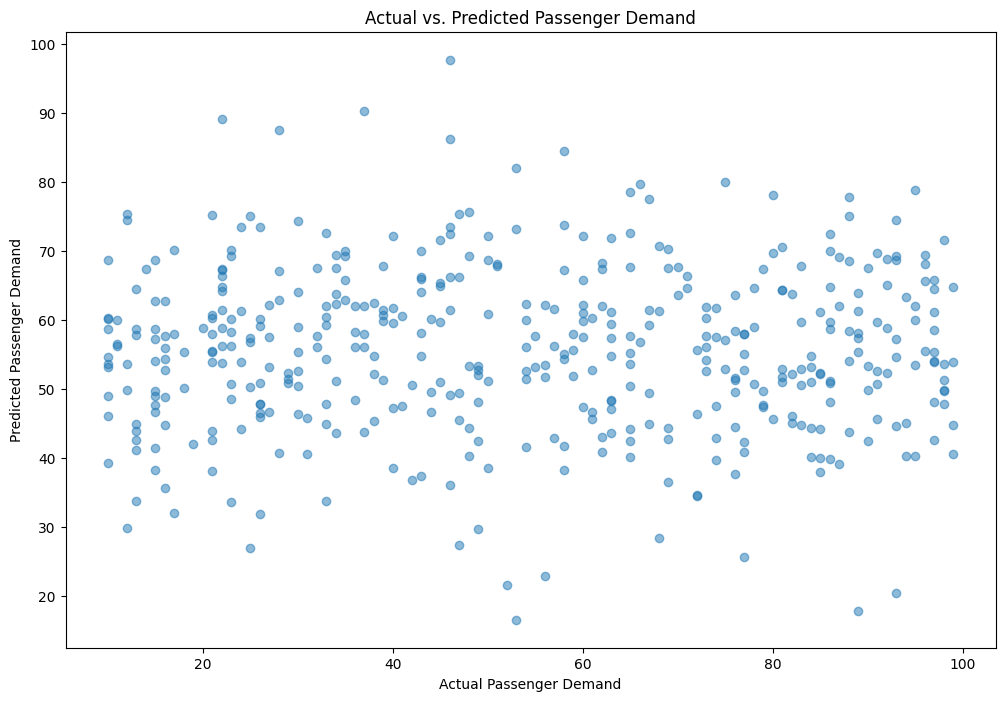

In [21]:
# Plotting the actual vs. predicted passenger demand
plt.figure(figsize=(12, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs. Predicted Passenger Demand')
plt.xlabel('Actual Passenger Demand')
plt.ylabel('Predicted Passenger Demand')
plt.show()
